# Week11 - Clustering Lab

* Create clusters for the following dataset
* Choose a meaningful cluster count
* Identify potential labels for each cluster

In [1]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import pandas as pd

def get_data():
    r = urllib2.urlopen("https://github.com/msaricaumbc/DS_data/blob/master/ds602/people_wiki.zip?raw=true").read()
    file = ZipFile(BytesIO(r))
    people_wiki_csv = file.open("people_wiki.csv")
    people = pd.read_csv(people_wiki_csv)
    people.drop('URI', inplace=True, axis=1)
    return people

people = get_data()
people.head()

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [2]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(people['text'])
km = KMeans(n_clusters=5, random_state=0)
km.fit(X)
people['cluster'] = km.labels_
print(people.head(10))

                  name                                               text  \
0        Digby Morrell  digby morrell born 10 october 1979 is a former...   
1       Alfred J. Lewy  alfred j lewy aka sandy lewy graduated from un...   
2        Harpdog Brown  harpdog brown is a singer and harmonica player...   
3  Franz Rottensteiner  franz rottensteiner born in waidmannsfeld lowe...   
4               G-Enka  henry krvits born 30 december 1974 in tallinn ...   
5        Sam Henderson  sam henderson born october 18 1969 is an ameri...   
6        Aaron LaCrate  aaron lacrate is an american music producer re...   
7      Trevor Ferguson  trevor ferguson aka john farrow born 11 novemb...   
8         Grant Nelson  grant nelson born 27 april 1971 in london also...   
9         Cathy Caruth  cathy caruth born 1955 is frank h t rhodes pro...   

   cluster  
0        1  
1        2  
2        0  
3        2  
4        0  
5        2  
6        0  
7        4  
8        0  
9        2  


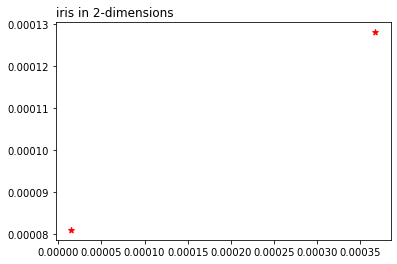

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)


import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', marker='*')

plt.title('iris in 2-dimensions', loc='left')
#plt.legend()

plt.show()

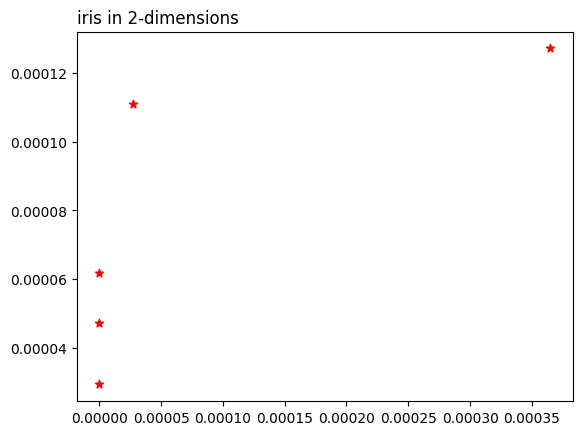

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)


import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', marker='*')

plt.title('iris in 2-dimensions', loc='left')
#plt.legend()

plt.show()

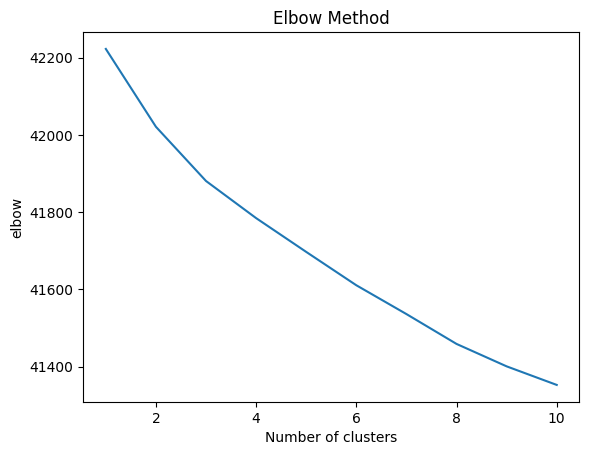

In [26]:
elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
plt.plot(range(1, 11), elbow)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('elbow')
plt.show()

In [40]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(people['text'])


kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
a_three = vectorizer.get_feature_names_out()

# print the words 
for i in range(3):
    print(f"\nTop words for Cluster {i+1}:")
    for n in order_centroids[i, :10]:
        print(f"{a_three[n]}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Top words for Cluster 1:
music
film
new
album
art
band
television
award
series
work

Top words for Cluster 2:
league
season
team
played
football
games
coach
club
player
cup

Top words for Cluster 3:
university
served
member
president
law
party
research
professor
minister
election


In [41]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(people['text'])


kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
a_five = vectorizer.get_feature_names_out()

# print the words 
for i in range(5):
    print(f"\nTop words for Cluster {i+1}:")
    for n in order_centroids[i, :10]:
        print(f"{a_five[n]}")


Top words for Cluster 1:
music
album
band
released
orchestra
jazz
song
records
songs
albums

Top words for Cluster 2:
league
season
team
played
football
coach
games
club
player
cup

Top words for Cluster 3:
university
new
research
art
book
work
published
professor
american
born

Top words for Cluster 4:
party
election
minister
law
served
member
elected
state
president
district

Top words for Cluster 5:
film
theatre
television
films
series
award
actor
role
directed
festival


In [42]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(people['text'])

kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X)

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
a_seven = vectorizer.get_feature_names_out()

# print the  words
for i in range(7):
    print(f"\nTop words for Cluster {i+1}:")
    for n in order_centroids[i, :10]:
        print(f"{a_seven[n]}")



Top words for Cluster 1:
league
baseball
major
season
games
runs
pitcher
played
minor
sox

Top words for Cluster 2:
party
election
minister
served
member
elected
president
state
general
law

Top words for Cluster 3:
film
new
art
television
work
series
award
book
york
born

Top words for Cluster 4:
world
championships
won
tour
championship
team
olympics
race
racing
finished

Top words for Cluster 5:
university
research
professor
science
institute
studies
law
phd
international
college

Top words for Cluster 6:
music
album
band
released
orchestra
jazz
song
records
songs
albums

Top words for Cluster 7:
season
football
league
played
team
coach
club
cup
player
games


In [8]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
labels = {0: "Musicians", 1: "Football-game", 2: "Research-University", 3: "Elections", 4: "Movie-Industry"}
cluster_labels = [labels[label] for label in kmeans.labels_]
people['label'] = cluster_labels
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
five = vectorizer.get_feature_names_out()

# Print the words for 5 clusters 
for i in range(5):
    print(f"\nTop words for Cluster {i+1}:")
    for n in order_centroids[i, :10]:
        print(f"{five[n]}")
    
print(people[['name', 'text', 'label']])


Top words for Cluster 1:
music
album
band
released
orchestra
jazz
song
records
songs
albums

Top words for Cluster 2:
league
season
team
played
football
coach
games
club
player
cup

Top words for Cluster 3:
university
new
research
art
book
work
published
professor
american
born

Top words for Cluster 4:
party
election
minister
law
served
member
elected
state
president
district

Top words for Cluster 5:
film
theatre
television
films
series
award
actor
role
directed
festival
                                     name  \
0                           Digby Morrell   
1                          Alfred J. Lewy   
2                           Harpdog Brown   
3                     Franz Rottensteiner   
4                                  G-Enka   
...                                   ...   
42781                  Motoaki Takenouchi   
42782  Alan Judge (footballer, born 1960)   
42783                        Eduardo Lara   
42784                Tatiana Faberg%C3%A9   
42785                     